In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np

In [ ]:
# Reading the Dataframe into the dataset

df = pd.read_csv("/content/drug200.csv")

In [ ]:
# Exploring the Data

df.shape

(200, 6)

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
# Checking for null values

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
# Splitting Dependent and independent columns

x = df.iloc[:, 0:5]
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [ ]:
y = df['Drug']
y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [ ]:
# Train Test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 15)
x_train.shape

(160, 5)

Data Pre-Processing

In [ ]:
# Encoding Sex Column with Label Encoder

from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
x_train['Sex'] = le.fit_transform(x_train['Sex'])
x_test['Sex'] = le.transform(x_test['Sex'])


In [ ]:
# User defined Encodings for BP and Cholesterol column

x_train[['BP', 'Cholesterol']] = x_train[['BP', 'Cholesterol']].replace({'HIGH':1, 'LOW':-1, 'NORMAL':0})
x_test[['BP', 'Cholesterol']] = x_test[['BP', 'Cholesterol']].replace({'HIGH':1, 'LOW':-1, 'NORMAL':0})
x_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
47,68,1,-1,1,10.291
142,60,1,1,0,8.621
149,22,1,-1,1,8.151
152,55,1,0,0,7.261
182,20,0,-1,0,11.686


In [ ]:
x_test.head()

,Age,Sex,BP,Cholesterol,Na_to_K
49,28,0,-1,1,19.796
191,23,1,1,1,8.011
12,43,1,-1,1,15.376
172,39,0,0,0,17.225
127,35,1,0,0,7.845


In [ ]:
# One-hot encoding the output labels

train_labels = pd.get_dummies(y_train)

In [ ]:
test_labels = pd.get_dummies(y_test)

In [ ]:
train_labels

,DrugY,drugA,drugB,drugC,drugX
47,0,0,0,1,0
142,0,0,1,0,0
149,0,0,0,1,0
152,0,0,0,0,1
182,0,0,0,0,1
...,...,...,...,...,...
156,0,1,0,0,0
128,1,0,0,0,0
119,1,0,0,0,0
133,1,0,0,0,0


Model

In [ ]:
# Tensorflow for classification model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Softmax


In [ ]:
# Buildin the ANN model

model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Model training

model.fit(x_train, train_labels, batch_size=20, epochs = 97)

Epoch 1/97
8/8 [==============================] - 0s 4ms/step - loss: 0.4274 - accuracy: 0.7875
Epoch 2/97
8/8 [==============================] - 0s 4ms/step - loss: 0.4146 - accuracy: 0.8250
Epoch 3/97
8/8 [==============================] - 0s 3ms/step - loss: 0.3744 - accuracy: 0.8438
Epoch 4/97
8/8 [==============================] - 0s 4ms/step - loss: 0.3701 - accuracy: 0.8313
Epoch 5/97
8/8 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.8375
Epoch 6/97
8/8 [==============================] - 0s 3ms/step - loss: 0.3348 - accuracy: 0.8625
Epoch 7/97
8/8 [==============================] - 0s 4ms/step - loss: 0.3680 - accuracy: 0.8375
Epoch 8/97
8/8 [==============================] - 0s 4ms/step - loss: 0.3766 - accuracy: 0.8375
Epoch 9/97
8/8 [==============================] - 0s 3ms/step - loss: 0.4927 - accuracy: 0.7688
Epoch 10/97
8/8 [==============================] - 0s 3ms/step - loss: 0.5081 - accuracy: 0.7937
Epoch 11/97
8/8 [======================

Prediction

In [ ]:
y_pred  = model.predict(x_test)

2/2 [==============================] - 0s 5ms/step


In [ ]:
# Ground truth
comp = pd.DataFrame()
comp['Actual'] = y_test

In [ ]:
names = ["DrugY",	"drugA",	"drugB",	"drugC",	"drugX"]

In [ ]:
# Predicted probabilites for each class label

comp[names] = y_pred

In [ ]:
comp.head()

,Actual,DrugY,drugA,drugB,drugC,drugX
49,DrugY,0.999989,1.440714e-17,5.370438e-10,1.340287e-06,0.000009
191,drugA,0.000458,9.782778e-01,1.693542e-02,2.533047e-06,0.004326
12,DrugY,0.735628,5.489653e-15,8.426823e-07,4.635879e-02,0.218012
172,DrugY,0.999982,2.602142e-13,4.723742e-08,4.889395e-09,0.000018
127,drugX,0.031214,5.353622e-05,1.761537e-02,1.257200e-02,0.938545


In [ ]:
# Getting the class with the maximum probability as the prediction

output = comp.iloc[:, 1:6]
comp['Predicted'] = output.idxmax(axis = 1)

In [ ]:
comp.head()

,Actual,DrugY,drugA,drugB,drugC,drugX,Predicted
49,DrugY,0.999989,1.440714e-17,5.370438e-10,1.340287e-06,0.000009,DrugY
191,drugA,0.000458,9.782778e-01,1.693542e-02,2.533047e-06,0.004326,drugA
12,DrugY,0.735628,5.489653e-15,8.426823e-07,4.635879e-02,0.218012,DrugY
172,DrugY,0.999982,2.602142e-13,4.723742e-08,4.889395e-09,0.000018,DrugY
127,drugX,0.031214,5.353622e-05,1.761537e-02,1.257200e-02,0.938545,drugX


Results

In [ ]:
print("Model accuracy is:", model.evaluate(x_test, test_labels)[1])

2/2 [==============================] - 0s 7ms/step - loss: 0.3675 - accuracy: 0.8750
Model accuracy is: 0.875


In [ ]:
comp = comp.drop(comp.iloc[:,1:6], axis = 1)

In [ ]:
comp.head(10)

,Actual,Predicted
49,DrugY,DrugY
191,drugA,drugA
12,DrugY,DrugY
172,DrugY,DrugY
127,drugX,drugX
40,DrugY,DrugY
30,drugX,drugX
170,drugX,DrugY
138,drugB,drugB
57,DrugY,DrugY


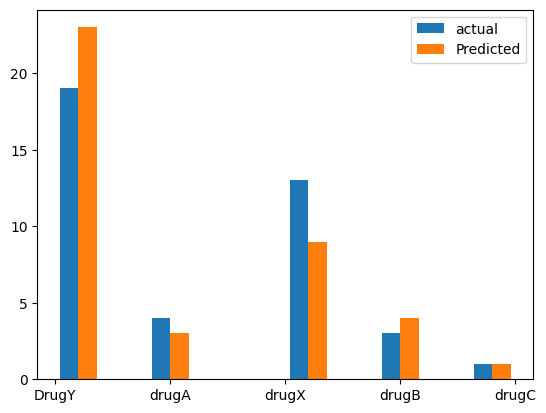

In [ ]:
#Visualising with histogram

import matplotlib.pyplot as plt
plt.hist([comp['Actual'], comp['Predicted']])
plt.legend(['actual', 'Predicted'])